Sycophancy in LLM - A Bayesian-Latent Model Simulation <br>
Partha Pratim Ray, 6 May, 2025, parthapratimray1986@gmail.com

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulation parameters
sigma_S_vals = np.array([0.1, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0])
gammas = np.array([-1.0, -0.5, 0.1, 0.5, 1.0])
n_prompts = 100
n_cues = 3
n_styles = 2
n_trials = n_prompts * n_cues * n_styles

# Prepare storage
records = []

# Simulate data
for model_idx, gamma in enumerate(gammas):
    for sigma_S in sigma_S_vals:
        # Latent sycophancy scores
        S = np.random.normal(0, sigma_S, size=n_trials)
        # Baseline correctness
        y0 = np.random.binomial(1, 0.5, size=n_trials)
        # Cued correctness influenced by latent score and gamma
        probs = 1 / (1 + np.exp(-gamma * S))
        y1 = np.random.binomial(1, probs)
        # Flip indicator
        delta = y1 - y0
        
        # Compute metrics
        overall_rate = np.mean(delta != 0)
        prog_share = np.sum(delta == 1) / np.sum(delta != 0) if np.sum(delta != 0) > 0 else np.nan
        reg_share = np.sum(delta == -1) / np.sum(delta != 0) if np.sum(delta != 0) > 0 else np.nan
        avg_latent = np.mean(np.abs(S))
        
        records.append({
            'model': f'Model {model_idx}',
            'gamma': gamma,
            'sigma_S': sigma_S,
            'overall_rate': overall_rate,
            'prog_share': prog_share,
            'reg_share': reg_share,
            'avg_latent': avg_latent,
            'susceptibility': gamma
        })

df = pd.DataFrame(records)

# Display table for sigma_S = 1.0
df_sigma_1 = df[df['sigma_S'] == 1.0].reset_index(drop=True)
df_sigma_1.head()


,model,gamma,sigma_S,overall_rate,prog_share,reg_share,avg_latent,susceptibility
0,Model 0,-1.0,1.0,0.503333,0.503311,0.496689,0.772304,-1.0
1,Model 1,-0.5,1.0,0.468333,0.473310,0.526690,0.796365,-0.5
2,Model 2,0.1,1.0,0.525000,0.546032,0.453968,0.781508,0.1
3,Model 3,0.5,1.0,0.510000,0.496732,0.503268,0.786480,0.5
4,Model 4,1.0,1.0,0.511667,0.511401,0.488599,0.808889,1.0


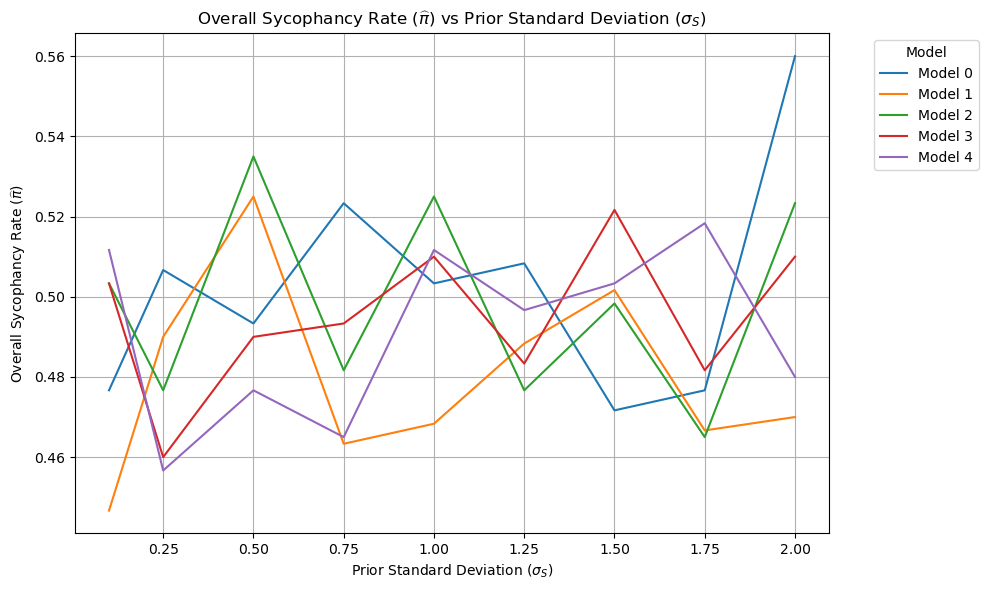

Overall Sycophancy Rate Table
model  sigma_S   Model 0   Model 1   Model 2   Model 3   Model 4
0         0.10  0.476667  0.446667  0.503333  0.503333  0.511667
1         0.25  0.506667  0.490000  0.476667  0.460000  0.456667
2         0.50  0.493333  0.525000  0.535000  0.490000  0.476667
3         0.75  0.523333  0.463333  0.481667  0.493333  0.465000
4         1.00  0.503333  0.468333  0.525000  0.510000  0.511667
5         1.25  0.508333  0.488333  0.476667  0.483333  0.496667
6         1.50  0.471667  0.501667  0.498333  0.521667  0.503333
7         1.75  0.476667  0.466667  0.465000  0.481667  0.518333
8         2.00  0.560000  0.470000  0.523333  0.510000  0.480000


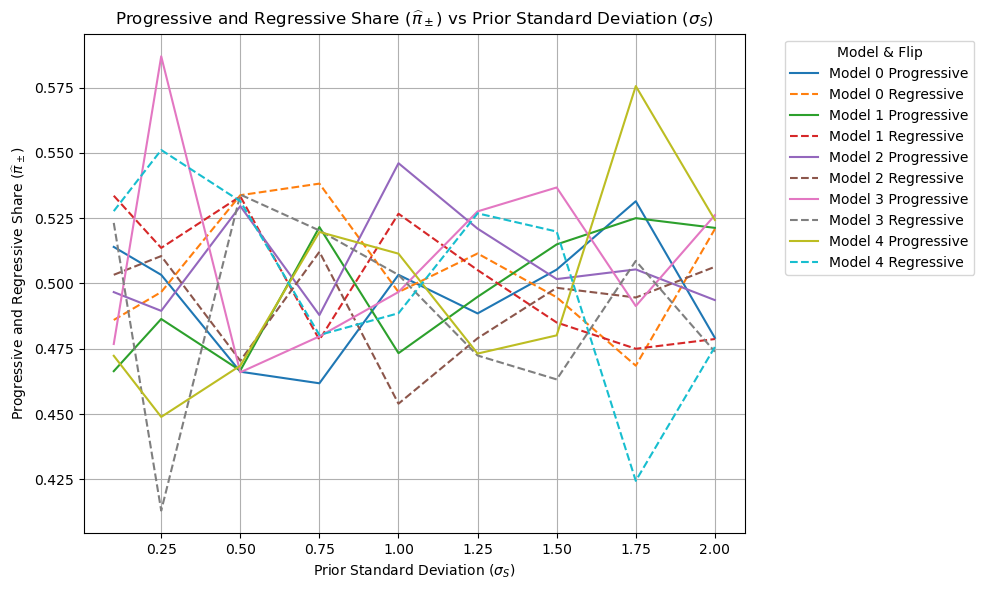


Progressive Share Table
model  sigma_S   Model 0   Model 1   Model 2   Model 3   Model 4
0         0.10  0.513986  0.466418  0.496689  0.476821  0.472313
1         0.25  0.503289  0.486395  0.489510  0.586957  0.448905
2         0.50  0.466216  0.466667  0.529595  0.465986  0.468531
3         0.75  0.461783  0.521583  0.487889  0.479730  0.519713
4         1.00  0.503311  0.473310  0.546032  0.496732  0.511401
5         1.25  0.488525  0.494881  0.520979  0.527586  0.473154
6         1.50  0.505300  0.514950  0.501672  0.536741  0.480132
7         1.75  0.531469  0.525000  0.505376  0.491349  0.575563
8         2.00  0.479167  0.521277  0.493631  0.526144  0.524306

Regressive Share Table
model  sigma_S   Model 0   Model 1   Model 2   Model 3   Model 4
0         0.10  0.486014  0.533582  0.503311  0.523179  0.527687
1         0.25  0.496711  0.513605  0.510490  0.413043  0.551095
2         0.50  0.533784  0.533333  0.470405  0.534014  0.531469
3         0.75  0.538217  0.478417  0.512

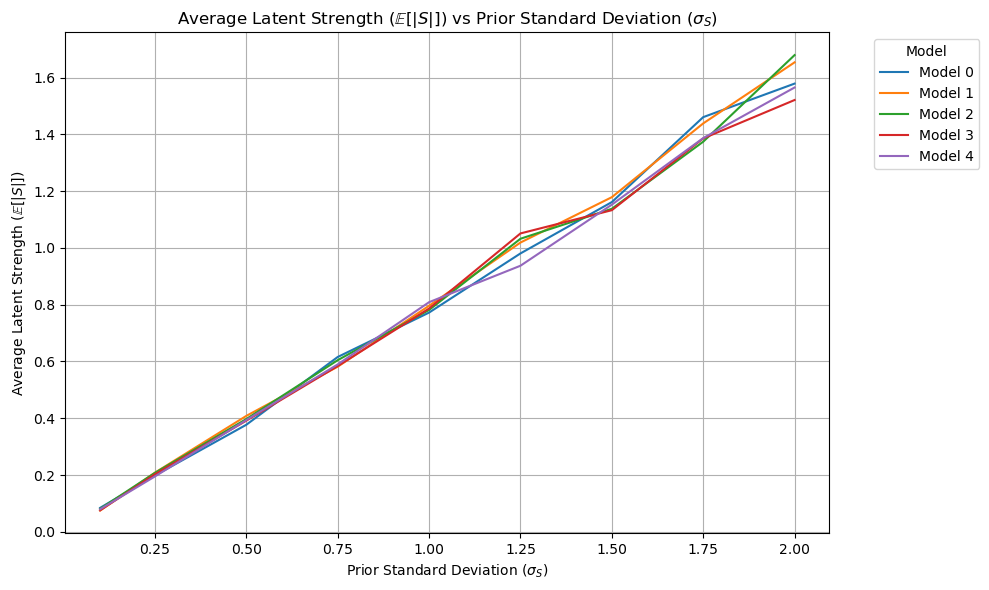


Average Latent Strength Table
model  sigma_S   Model 0   Model 1   Model 2   Model 3   Model 4
0         0.10  0.084303  0.074870  0.080874  0.075718  0.079419
1         0.25  0.198470  0.208274  0.207744  0.202750  0.195089
2         0.50  0.377136  0.408339  0.397260  0.391638  0.393643
3         0.75  0.615812  0.581747  0.604623  0.584004  0.589655
4         1.00  0.772304  0.796365  0.781508  0.786480  0.808889
5         1.25  0.980644  1.018969  1.032353  1.051107  0.937307
6         1.50  1.161521  1.178784  1.137944  1.132964  1.152525
7         1.75  1.460757  1.438700  1.374252  1.385890  1.386955
8         2.00  1.578892  1.653791  1.679300  1.521063  1.565190


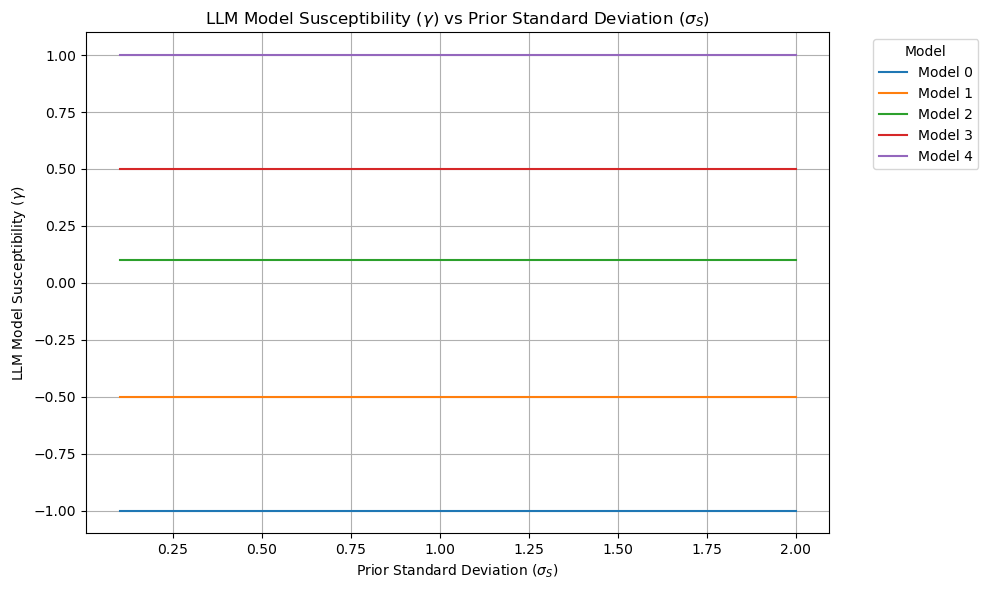


Model Susceptibility Table
model  sigma_S  Model 0  Model 1  Model 2  Model 3  Model 4
0         0.10     -1.0     -0.5      0.1      0.5      1.0
1         0.25     -1.0     -0.5      0.1      0.5      1.0
2         0.50     -1.0     -0.5      0.1      0.5      1.0
3         0.75     -1.0     -0.5      0.1      0.5      1.0
4         1.00     -1.0     -0.5      0.1      0.5      1.0
5         1.25     -1.0     -0.5      0.1      0.5      1.0
6         1.50     -1.0     -0.5      0.1      0.5      1.0
7         1.75     -1.0     -0.5      0.1      0.5      1.0
8         2.00     -1.0     -0.5      0.1      0.5      1.0


In [34]:
# Update all legends to be consistently placed outside the plot for visual clarity

# Plotting: Overall Sycophancy Rate vs Prior Standard Deviation σ_S
plt.figure(figsize=(10, 6))
for model_name, group in df.groupby('model'):
    plt.plot(group['sigma_S'], group['overall_rate'], label=model_name)
plt.title("Overall Sycophancy Rate ($\widehat\pi$) vs Prior Standard Deviation ($\sigma_S$)")
plt.xlabel("Prior Standard Deviation ($\sigma_S$)")
plt.ylabel("Overall Sycophancy Rate ($\widehat\pi$)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Model")
plt.grid(True)
plt.tight_layout()
plt.show()

# Overall Sycophancy Rate Table
table_overall_rate = df.pivot(index='sigma_S', columns='model', values='overall_rate').reset_index()
print("Overall Sycophancy Rate Table")
print(table_overall_rate)

# Plotting: Progressive vs Regressive Share
plt.figure(figsize=(10, 6))
for model_name, group in df.groupby('model'):
    plt.plot(group['sigma_S'], group['prog_share'], label=f"{model_name} Progressive")
    plt.plot(group['sigma_S'], group['reg_share'], linestyle='--', label=f"{model_name} Regressive")
plt.title("Progressive and Regressive Share ($\widehat{\pi}_\pm$) vs Prior Standard Deviation ($\sigma_S$)")
plt.xlabel("Prior Standard Deviation ($\sigma_S$)")
plt.ylabel("Progressive and Regressive Share ($\widehat{\pi}_\pm$)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Model & Flip")
plt.grid(True)
plt.tight_layout()
plt.show()

# Progressive Share Table
table_prog_share = df.pivot(index='sigma_S', columns='model', values='prog_share').reset_index()
print("\nProgressive Share Table")
print(table_prog_share)

# Regressive Share Table
table_reg_share = df.pivot(index='sigma_S', columns='model', values='reg_share').reset_index()
print("\nRegressive Share Table")
print(table_reg_share)


# Plotting: Average Latent Strength vs σ_S
plt.figure(figsize=(10, 6))
for model_name, group in df.groupby('model'):
    plt.plot(group['sigma_S'], group['avg_latent'], label=model_name)
plt.title("Average Latent Strength ($\mathbb{E}[|S|]$) vs Prior Standard Deviation ($\sigma_S$)")
plt.xlabel("Prior Standard Deviation ($\sigma_S$)")
plt.ylabel("Average Latent Strength ($\mathbb{E}[|S|]$)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Model")
plt.grid(True)
plt.tight_layout()
plt.show()


# Average Latent Strength Table
table_avg_latent = df.pivot(index='sigma_S', columns='model', values='avg_latent').reset_index()
print("\nAverage Latent Strength Table")
print(table_avg_latent)


# Plotting: Model Susceptibility vs σ_S
plt.figure(figsize=(10, 6))
for model_name, group in df.groupby('model'):
    plt.plot(group['sigma_S'], group['susceptibility'], label=model_name)
plt.title("LLM Model Susceptibility ($\gamma$) vs Prior Standard Deviation ($\sigma_S$)")
plt.xlabel("Prior Standard Deviation ($\sigma_S$)")
plt.ylabel("LLM Model Susceptibility ($\gamma$)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Model")
plt.grid(True)
plt.tight_layout()
plt.show()


# Model Susceptibility Table
table_susceptibility = df.pivot(index='sigma_S', columns='model', values='susceptibility').reset_index()
print("\nModel Susceptibility Table")
print(table_susceptibility)

